In [ ]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px

In [ ]:
df = pd.read_csv('https://github.com/edeliciouso/Predicting-Yields-for-Potatoes/blob/main/MergedDataFinal4.csv?raw=true')
df

,Country,Item,Year,Yield (100 hg/ha),Pesticides (Tons),Rainfall (mm),Fertilizer (kg/ha)
0,Albania,Maize (corn),2009,55693,410.55,1485.0,79.08
1,Albania,Maize (corn),2010,66790,590.50,1485.0,76.47
2,Albania,Maize (corn),2011,59869,582.68,1485.0,87.08
3,Albania,Maize (corn),2012,67290,361.62,1485.0,82.79
4,Albania,Maize (corn),2013,69533,450.60,1485.0,78.15
...,...,...,...,...,...,...,...
1194,Zimbabwe,Maize (corn),2015,5803,2185.07,657.0,19.17
1195,Zimbabwe,Maize (corn),2016,4405,2185.07,657.0,31.78
1196,Zimbabwe,Maize (corn),2017,13933,2185.07,657.0,35.71
1197,Zimbabwe,Maize (corn),2018,13506,2185.07,657.0,32.39


In [ ]:
df.head()

,Country,Item,Year,Yield (100 hg/ha),Pesticides (Tons),Rainfall (mm),Fertilizer (kg/ha)
0,Albania,Maize (corn),2009,55693,410.55,1485.0,79.08
1,Albania,Maize (corn),2010,66790,590.50,1485.0,76.47
2,Albania,Maize (corn),2011,59869,582.68,1485.0,87.08
3,Albania,Maize (corn),2012,67290,361.62,1485.0,82.79
4,Albania,Maize (corn),2013,69533,450.60,1485.0,78.15


In [ ]:
df.tail()

,Country,Item,Year,Yield (100 hg/ha),Pesticides (Tons),Rainfall (mm),Fertilizer (kg/ha)
1194,Zimbabwe,Maize (corn),2015,5803,2185.07,657.0,19.17
1195,Zimbabwe,Maize (corn),2016,4405,2185.07,657.0,31.78
1196,Zimbabwe,Maize (corn),2017,13933,2185.07,657.0,35.71
1197,Zimbabwe,Maize (corn),2018,13506,2185.07,657.0,32.39
1198,Zimbabwe,Maize (corn),2019,7807,2185.07,657.0,32.39


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             1199 non-null   object 
 1   Item                1199 non-null   object 
 2   Year                1199 non-null   int64  
 3   Yield (100 hg/ha)   1199 non-null   int64  
 4   Pesticides (Tons)   1199 non-null   float64
 5   Rainfall (mm)       1199 non-null   float64
 6   Fertilizer (kg/ha)  1199 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 65.7+ KB


In [ ]:
df.describe()

,Year,Yield (100 hg/ha),Pesticides (Tons),Rainfall (mm),Fertilizer (kg/ha)
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000
mean,2014.000000,48154.522936,22856.889908,1198.230275,101.095213
std,3.163597,39644.022896,64773.491441,763.058945,96.299422
min,2009.000000,4405.000000,3.380000,18.100000,0.010000
25%,2011.000000,19988.000000,703.120000,619.000000,24.950000
50%,2014.000000,36965.000000,3327.670000,1039.000000,78.720000
75%,2017.000000,65696.500000,13266.785000,1705.000000,148.415000
max,2019.000000,340977.000000,620537.980000,3240.000000,692.150000


In [ ]:
df.isnull().sum()

Country               0
Item                  0
Year                  0
Yield (100 hg/ha)     0
Pesticides (Tons)     0
Rainfall (mm)         0
Fertilizer (kg/ha)    0
dtype: int64

In [ ]:
df['Country'].value_counts()

Albania               11
Mauritius             11
North Macedonia       11
Nigeria               11
Niger                 11
                      ..
Dominican Republic    11
Czechia               11
Cuba                  11
Croatia               11
Zimbabwe              11
Name: Country, Length: 109, dtype: int64

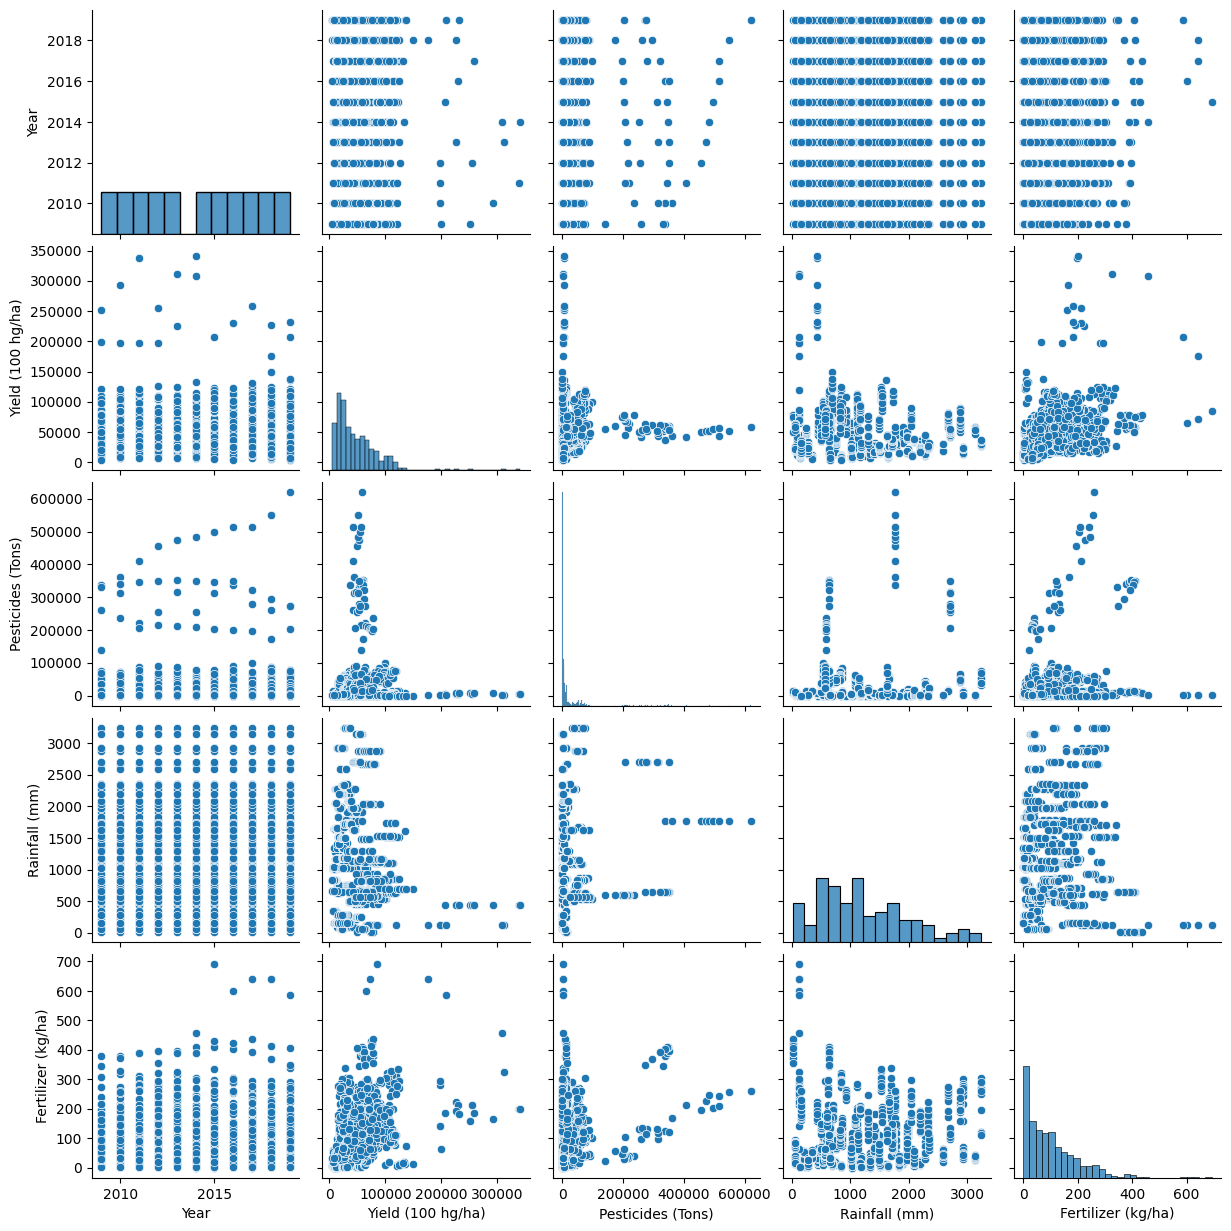

In [ ]:
sns.pairplot(df)

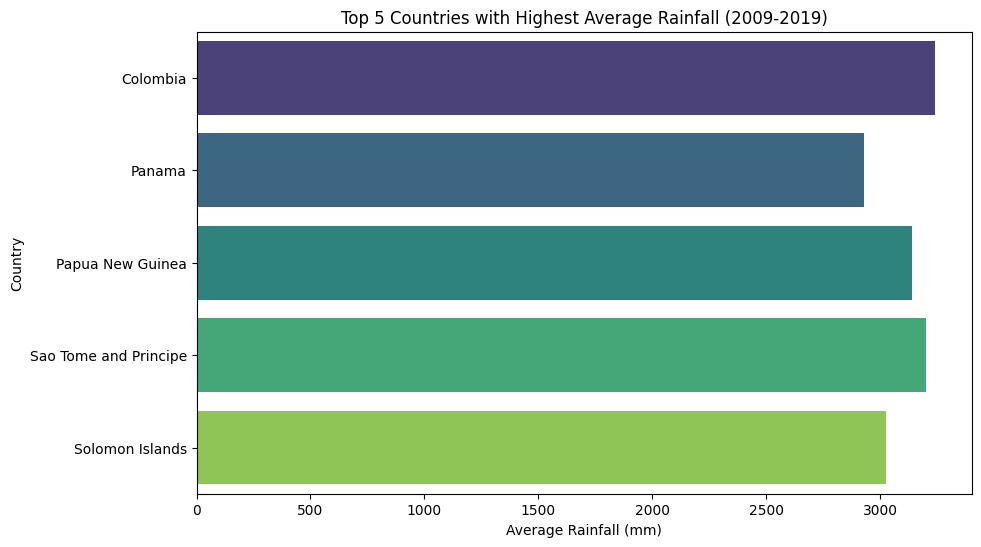

In [ ]:
# rain data

rain_data = pd.read_csv('https://github.com/edeliciouso/Predicting-Yields-for-Potatoes/blob/main/average-precipitation-per-year.csv?raw=true')

# Filter the rain data for the years 2009 to 2019
filtered_rain_data = rain_data[(rain_data['Year'] >= 2009) & (rain_data['Year'] <= 2019)]

# Aggregate data to calculate average rainfall for each country
average_rainfall = filtered_rain_data.groupby('Entity')['Average precipitation in depth (mm per year)'].mean().reset_index()

# Select the top 5 countries with the highest average rainfall
top_countries_rain = average_rainfall.nlargest(5, 'Average precipitation in depth (mm per year)')['Entity']

# Filter the original data for the top countries
top_countries_rain_data = filtered_rain_data[filtered_rain_data['Entity'].isin(top_countries_rain)]

# Create a bar plot for average rainfall in the top 5 countries
plt.figure(figsize=(10, 6))
sns.barplot(x='Average precipitation in depth (mm per year)', y='Entity', data=top_countries_rain_data, palette='viridis')
plt.title('Top 5 Countries with Highest Average Rainfall (2009-2019)')
plt.xlabel('Average Rainfall (mm)')
plt.ylabel('Country')
plt.show()

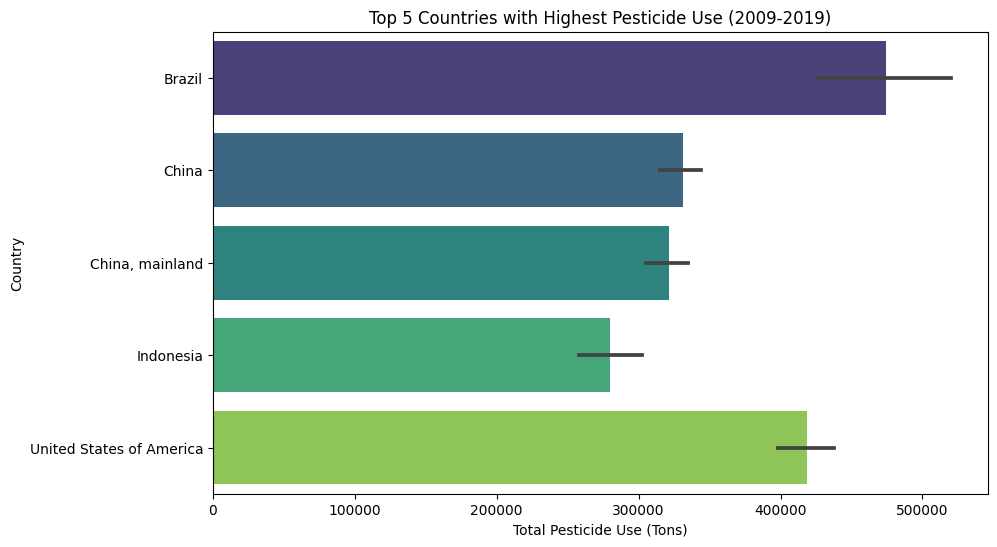

In [ ]:
# pesticides data

pest_data = pd.read_csv('https://github.com/edeliciouso/Predicting-Yields-for-Potatoes/blob/main/FAOSTAT_pest.csv?raw=true')

# Aggregate data to calculate total pesticide use for each country
total_pesticide_use = pest_data.groupby('Area')['Value'].sum().reset_index()

# Select the top 5 countries with the highest total pesticide use
top_countries_pest = total_pesticide_use.nlargest(5, 'Value')['Area']

# Filter the original data for the top countries
top_countries_pest_data = pest_data[pest_data['Area'].isin(top_countries_pest)]

# Create a bar plot for pesticide use in the top 5 countries
plt.figure(figsize=(10, 6))
sns.barplot(x='Value', y='Area', data=top_countries_pest_data, palette='viridis')
plt.title('Top 5 Countries with Highest Pesticide Use (2009-2019)')
plt.xlabel('Total Pesticide Use (Tons)')
plt.ylabel('Country')
plt.show()

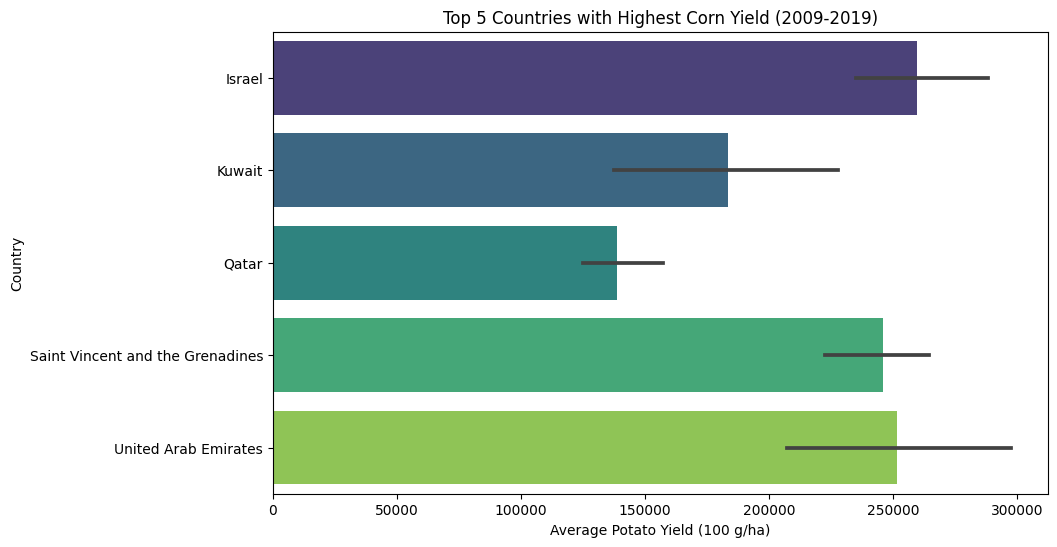

In [ ]:
# yield data

yield_data = pd.read_csv('https://github.com/edeliciouso/Predicting-Yields-for-Potatoes/blob/main/faostat_corn.csv?raw=true')

# Aggregate data to calculate average yield for each country
average_yield = yield_data.groupby('Area')['Value'].mean().reset_index()

# Select the top 5 countries with the highest average yield
top_countries_yield = average_yield.nlargest(5, 'Value')['Area']

# Filter the original data for the top countries
top_countries_yield_data = yield_data[yield_data['Area'].isin(top_countries_yield)]

# Create a bar plot for average yield in the top 5 countries
plt.figure(figsize=(10, 6))
sns.barplot(x='Value', y='Area', data=top_countries_yield_data, palette='viridis')
plt.title('Top 5 Countries with Highest Corn Yield (2009-2019)')
plt.xlabel('Average Potato Yield (100 g/ha)')
plt.ylabel('Country')
plt.show()

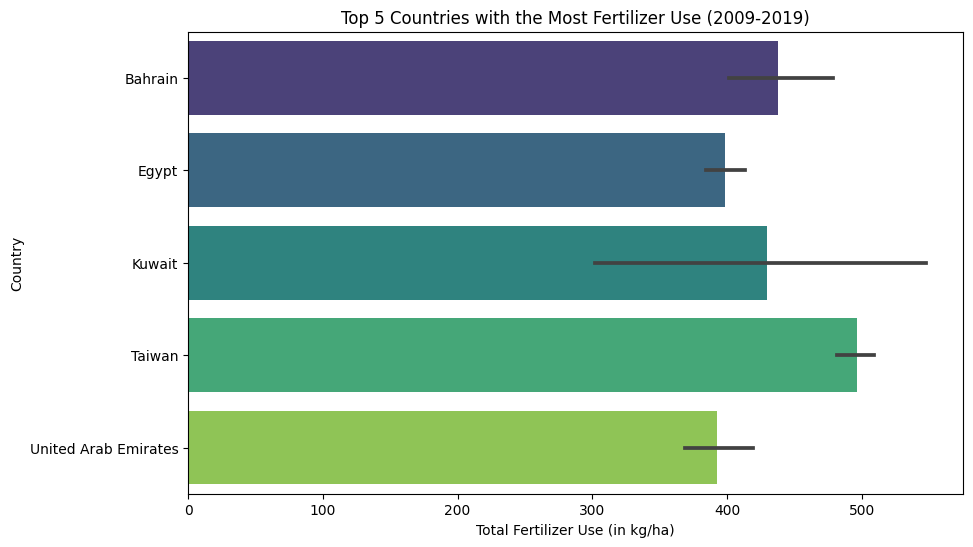

In [ ]:
# fertilizer data

fert_data = pd.read_csv('https://github.com/edeliciouso/Predicting-Yields-for-Potatoes/blob/main/fertilizerData.csv?raw=true')

# Aggregate data to calculate total fertilizer use for each country
total_fertilizer_use = fert_data.groupby('Entity')['Fertilizer (kg/ha)'].sum().reset_index()

# Select the top 5 countries with the highest average yield
top_countries_fertilizer = total_fertilizer_use.nlargest(5, 'Fertilizer (kg/ha)')['Entity']

# Filter the original data for the top countries
top_countries_fertilizer_data = fert_data[fert_data['Entity'].isin(top_countries_fertilizer)]

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x = top_countries_fertilizer_data['Fertilizer (kg/ha)'], y = top_countries_fertilizer_data['Entity'], palette='viridis')
plt.title('Top 5 Countries with the Most Fertilizer Use (2009-2019)')
plt.ylabel('Country')
plt.xlabel('Total Fertilizer Use (in kg/ha)')
plt.show()

<ipython-input-14-ebb72510d719>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


Text(0.5, 1.0, 'Heatmap')

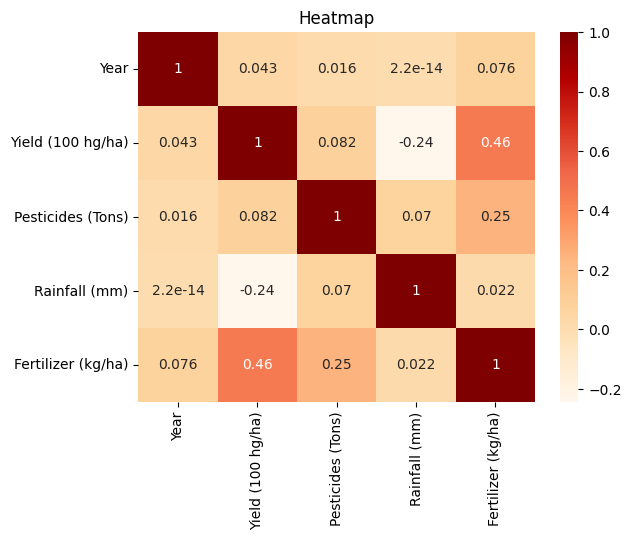

In [ ]:
# check correlation

cor = df.corr()
sns.heatmap(cor, cmap = 'OrRd', annot=True)
plt.title('Heatmap')

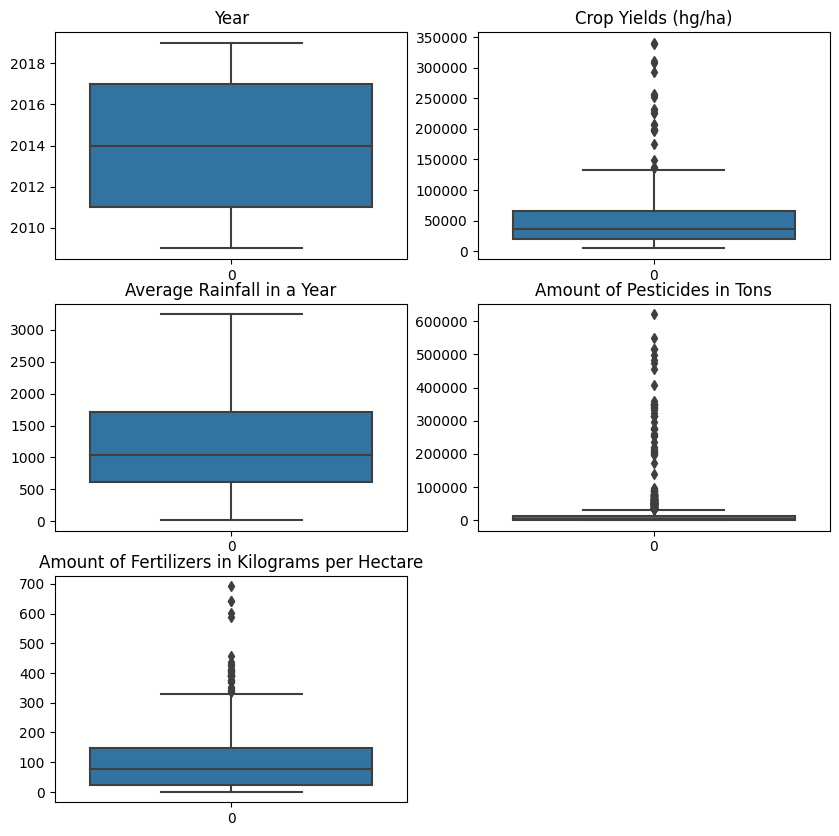

In [ ]:
# make the box plot

plt.figure(figsize = (10,10))

plt.subplot(3,2,1)
sns.boxplot(data= df['Year'])
plt.title('Year')

plt.subplot(3,2,2)
sns.boxplot(data= df['Yield (100 hg/ha)'])
plt.title('Crop Yields (hg/ha)')

plt.subplot(3,2,3)
sns.boxplot(data= df['Rainfall (mm)'])
plt.title('Average Rainfall in a Year')

plt.subplot(3,2,4)
sns.boxplot(data= df['Pesticides (Tons)'])
plt.title('Amount of Pesticides in Tons')

plt.subplot(3,2,5)
sns.boxplot(data= df['Fertilizer (kg/ha)'])
plt.title('Amount of Fertilizers in Kilograms per Hectare')

# plt.subplot(3,2,5)
# sns.boxplot(data= df['Phosphorus (Tons)'])
# plt.title('Amount of Phosphorus in Tons')

plt.show()